# SNOW Network Extraction

The SNOW algorithm, [published in Physical Review E](https://doi.org/10.1103/PhysRevE.96.023307), uses a marker-based watershed segmentation algorithm to partition an image into regions belonging to each pore.  The main contribution of the SNOW algorithm is to find a suitable set of initial markers in the image so that the watershed is not over-segmented.  SNOW is an acronym for Sub-Network of an Over-segmented Watershed.  This code works on both 2D and 3D images.  In this example a 2D image will be segmented using the predefined ``snow`` function in PoreSpy. 

## Import packages

In [1]:
import numpy as np
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()
np.random.seed(10)

## Create image

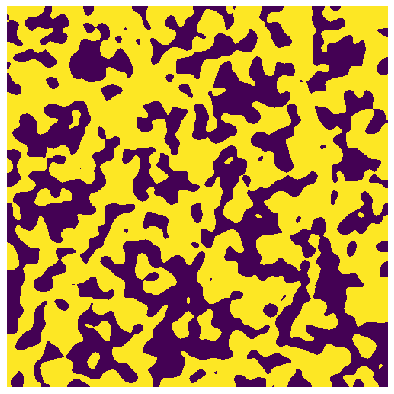

In [2]:
im = ps.generators.blobs(shape=[500, 500], porosity=0.6, blobiness=2)
plt.figure(figsize=(7,7))
plt.imshow(im)
plt.axis('off')
plt.show();

SNOW is composed of a series of filters, but PoreSpy has a single function that applies all the necessary steps:

In [3]:
snow_output = ps.networks.snow(
    im,
    voxel_size=1,
    boundary_faces=['left','right','front','back'],
    marching_cubes_area=False
)

  0%|          | 0/265 [00:00<?, ?it/s]

The ``snow`` function returns a python *dict* that is suitable for use in OpenPNM.

In [4]:
pn = op.network.GenericNetwork()
pn.update(snow_output)
prj = pn.project

OpenPNM has the ability to output network to a VTK file suitable for view in Paraivew:

In [5]:
prj.export_data(filename='extraction', filetype='vtk')

Finally, we can export the image in 'vti' format for visualization. PoreSpy offers a tool for this:

In [6]:
ps.io.to_vtk(np.array(im, dtype=int)[:, :, np.newaxis], 'im')

And the result after opening both files in ParaView is:

<img src="https://i.imgur.com/Zivig0U.png" width=60%>